In [ ]:
import pandas as pd
import numpy as np


rent_df = pd.read_excel("private-rental-report-2025-03.xlsx", sheet_name='Suburb', skiprows=14)

# Renaming 'Row Labels' to 'Suburb' and cleaning all column names
rent_df = rent_df.rename(columns={'Row Labels': 'Suburb'})
rent_df.columns = rent_df.columns.str.strip().str.replace(" ", "")

#  Dropping rows where suburb is missing or marked as total/aggregate rows
rent_df = rent_df[~rent_df['Suburb'].isin(['Metro', 'Greater Metropolitan', 'Total', np.nan])]
rent_df = rent_df.dropna(subset=['Suburb'])

# Replacing '*' with NaN and convert all Median columns to numeric
rent_df = rent_df.replace("*", np.nan)

# Keeping only 'Median' columns (i.e., rent values)
median_cols = [col for col in rent_df.columns if 'Median' in col]
for col in median_cols:
    rent_df[col] = pd.to_numeric(rent_df[col], errors='coerce')

#  Creating Derived Columns 

rent_df['Mean_Median_Rent'] = rent_df[median_cols].mean(axis=1)


print("Cleaned Suburb-Level Rental Data:")
print(rent_df[['Suburb', 'Mean_Median_Rent']].head())


rent_df.to_csv("cleaned_rent_data.csv", index=False)



Cleaned Suburb-Level Rental Data:
           Suburb  Mean_Median_Rent
1  Aberfoyle Park        590.000000
2        Adelaide        465.555556
3     Albert Park        675.833333
4        Alberton        475.000000
5         Aldgate        915.000000


C:\Users\loyol\AppData\Local\Temp\ipykernel_5880\3831455596.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rent_df = rent_df.replace("*", np.nan)


In [2]:
crd = pd.read_csv("cleaned_rent_data.csv")
crd.head()

,Suburb,Count,Median,Count.1,Median.1,Count.2,Median.2,Count.3,Median.3,Unnamed:9,...,Median.7,Unnamed:19,Unnamed:20,Count.8,Median.8,Unnamed:23,Unnamed:24,Unnamed:25,Unnamed:26,Mean_Median_Rent
0,Aberfoyle Park,NaN,NaN,NaN,495.0,NaN,585.0,NaN,NaN,NaN,...,700.0,30.0,580.0,NaN,NaN,NaN,NaN,35.0,580.0,590.000000
1,Adelaide,2396.0,400.0,274.0,650.0,73.0,690.0,17.0,280.0,2760.0,...,270.0,85.0,640.0,102.0,247.5,102.0,247.5,2945.0,409.0,465.555556
2,Albert Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,777.5,10.0,685.0,NaN,NaN,NaN,NaN,10.0,685.0,675.833333
3,Alberton,NaN,390.0,NaN,475.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,560.0,NaN,NaN,NaN,NaN,15.0,450.0,475.000000
4,Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1200.0,NaN,1200.0,NaN,NaN,NaN,NaN,NaN,1200.0,915.000000


In [ ]:
# Had some data issues with "Unnamed columns" so finding and printing only Unnamed columns
unnamed_cols = [col for col in rent_df.columns if "Unnamed" in col]
print("Unnamed columns:", unnamed_cols)
print(rent_df[unnamed_cols].head())


Unnamed columns: ['Unnamed:9', 'Unnamed:10', 'Unnamed:19', 'Unnamed:20', 'Unnamed:23', 'Unnamed:24', 'Unnamed:25', 'Unnamed:26']
   Unnamed:9  Unnamed:10  Unnamed:19  Unnamed:20  Unnamed:23  Unnamed:24  \
1        NaN       517.5        30.0       580.0         NaN         NaN   
2     2760.0       410.0        85.0       640.0       102.0       247.5   
3        NaN         NaN        10.0       685.0         NaN         NaN   
4       10.0       410.0         NaN       560.0         NaN         NaN   
5        NaN         NaN         NaN      1200.0         NaN         NaN   

   Unnamed:25  Unnamed:26  
1        35.0       580.0  
2      2945.0       409.0  
3        10.0       685.0  
4        15.0       450.0  
5         NaN      1200.0  


In [4]:

rent_df = rent_df.loc[:, ~rent_df.columns.str.contains("^Unnamed")]


In [5]:
rent_df.head()

,Suburb,Count,Median,Count.1,Median.1,Count.2,Median.2,Count.3,Median.3,Count.4,Median.4,Count.5,Median.5,Count.6,Median.6,Count.7,Median.7,Count.8,Median.8,Mean_Median_Rent
1,Aberfoyle Park,NaN,NaN,NaN,495.0,NaN,585.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,580.0,NaN,700.0,NaN,NaN,590.000000
2,Adelaide,2396.0,400.0,274.0,650.0,73.0,690.0,17.0,280.0,14.0,302.5,35.0,650.0,21.0,700.0,15.0,270.0,102.0,247.5,465.555556
3,Albert Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,580.0,NaN,670.0,NaN,777.5,NaN,NaN,675.833333
4,Alberton,NaN,390.0,NaN,475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.0,NaN,NaN,NaN,NaN,NaN,NaN,475.000000
5,Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.0,NaN,1200.0,NaN,NaN,915.000000


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_excel("private-rental-report-2025-03.xlsx", sheet_name="Suburb", skiprows=14)

# Renaming the suburb column and drop unnecessary 'Unnamed' columns
df = df.rename(columns={"Row Labels": "Suburb"})
df.columns = df.columns.str.strip()

# Keeping only suburb + median rent columns we care about
keep_cols = ["Suburb", "Median", "Median.1", "Median.2", "Median.5", "Median.6", "Median.7"]
df = df[keep_cols]

# Renaming the median rent columns clearly
df = df.rename(columns={
    "Median": "1BR_House",
    "Median.1": "2BR_House",
    "Median.2": "3BR_House",
    "Median.5": "1BR_Unit",
    "Median.6": "2BR_Unit",
    "Median.7": "3BR_Unit"
})

#  Drop any rows where Suburb is missing or is an aggregate label
df = df.dropna(subset=["Suburb"])
df = df[~df["Suburb"].isin(["Metro", "Greater Metropolitan", "Total"])]

# Step 6: Replace "*" with NaN and convert rent values to float
df.replace("*", np.nan, inplace=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Step 7: Add derived column: Mean rent (for each suburb where available)
df["Mean_Median_Rent"] = df.iloc[:, 1:7].mean(axis=1)

# Step 8: Save the cleaned file
df.to_csv("final_rent_data.csv", index=False)


print(df.head())


           Suburb  1BR_House  2BR_House  3BR_House  1BR_Unit  2BR_Unit  \
1  Aberfoyle Park        NaN      495.0      585.0       NaN     580.0   
2        Adelaide      400.0      650.0      690.0     650.0     700.0   
3     Albert Park        NaN        NaN        NaN     580.0     670.0   
4        Alberton      390.0      475.0        NaN     560.0       NaN   
5         Aldgate        NaN        NaN        NaN       NaN     630.0   

   3BR_Unit  Mean_Median_Rent  
1     700.0        590.000000  
2     270.0        560.000000  
3     777.5        675.833333  
4       NaN        475.000000  
5    1200.0        915.000000  


C:\Users\loyol\AppData\Local\Temp\ipykernel_5880\242671627.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=long_df, x="Dwelling_Type", y="Median_Rent", palette="Set2")


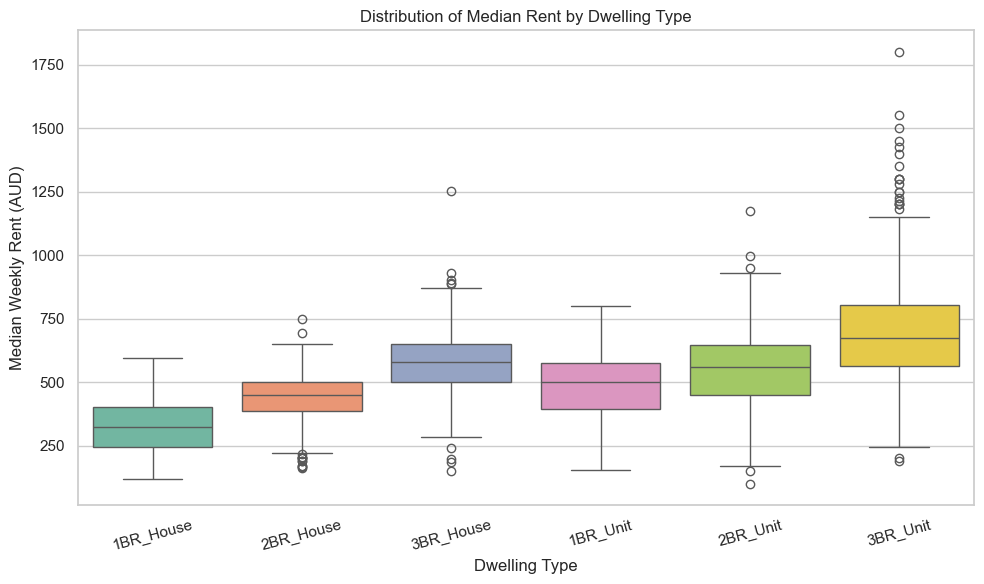

C:\Users\loyol\AppData\Local\Temp\ipykernel_5880\242671627.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


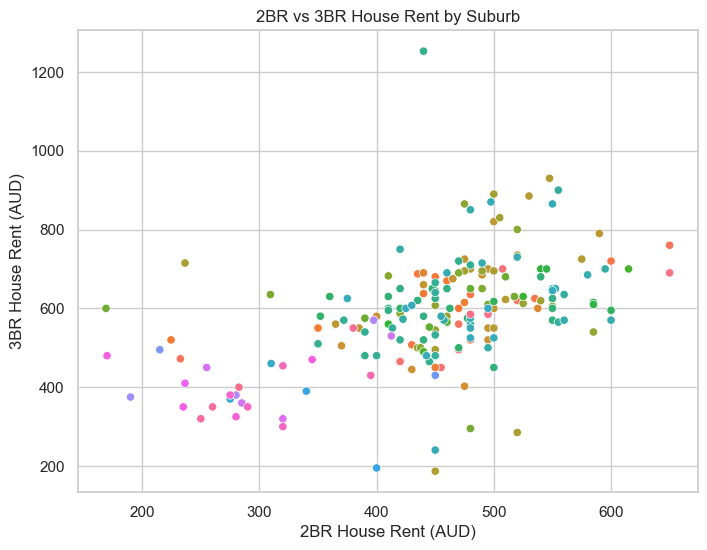

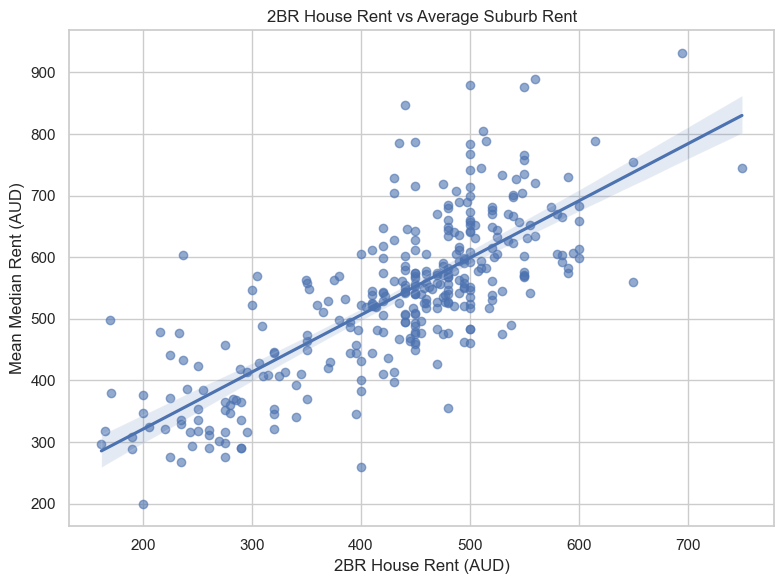

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned rent dataset
df = pd.read_csv("final_rent_data.csv")

# Set plot style
sns.set(style="whitegrid")


# Melt to long-form for box plotting
long_df = df.melt(id_vars="Suburb", 
                  value_vars=["1BR_House", "2BR_House", "3BR_House", "1BR_Unit", "2BR_Unit", "3BR_Unit"],
                  var_name="Dwelling_Type",
                  value_name="Median_Rent")

plt.figure(figsize=(10, 6))
sns.boxplot(data=long_df, x="Dwelling_Type", y="Median_Rent", palette="Set2")
plt.title("Distribution of Median Rent by Dwelling Type")
plt.ylabel("Median Weekly Rent (AUD)")
plt.xlabel("Dwelling Type")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="2BR_House", y="3BR_House", hue="Suburb")
plt.title("2BR vs 3BR House Rent by Suburb")
plt.xlabel("2BR House Rent (AUD)")
plt.ylabel("3BR House Rent (AUD)")
plt.tight_layout()
plt.legend([],[], frameon=False)  # hide overcrowded legend
plt.show()


plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="2BR_House", y="Mean_Median_Rent", scatter_kws={"alpha": 0.6})
plt.title("2BR House Rent vs Average Suburb Rent")
plt.xlabel("2BR House Rent (AUD)")
plt.ylabel("Mean Median Rent (AUD)")
plt.tight_layout()
plt.show()



--- REGRESSION SUMMARY ---
R-squared: 1.0
RMSE: 0.0
                                    Feature  Coefficient
0  Safe areas for children to play outdoors  -236.528156
1             A safe & secure place to live  2816.023704
2             A good place to bring up kids -1549.808225
3                  Lots of parks with trees   545.639317
4               Convenient for universities  -611.537016
5               Convenient public transport  -378.647417
6          Access to, recreation facilities  -388.503880
7                        Tree lined streets -1057.726527


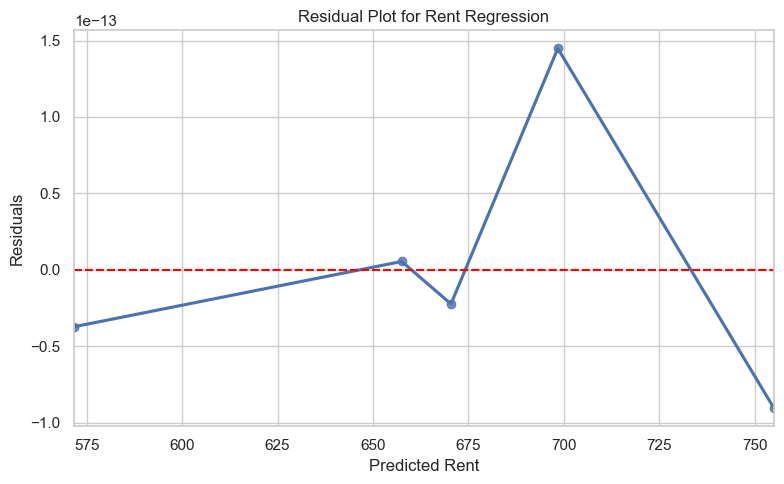

c:\Users\loyol\OneDrive\Documents\AU\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


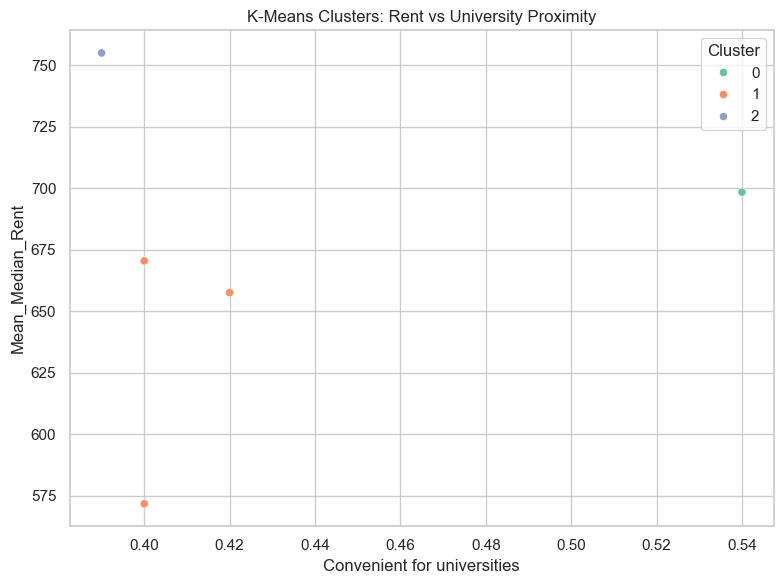

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("combined_final_data.csv")  

# Drop suburbs with missing values
df_clean = df.dropna()


# Target variable is  Mean rent
y = df_clean["Mean_Median_Rent"]

# Independent variables: Perception features from Q7
X = df_clean[[
    "Safe areas for children to play outdoors",
    "A safe & secure place to live",
    "A good place to bring up kids",
    "Lots of parks with trees",
    "Convenient for universities",
    "Convenient public transport",
    "Access to, recreation facilities",
    "Tree lined streets"
]]

# Train the model
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Print model results
print("\n--- REGRESSION SUMMARY ---")
print("R-squared:", round(r2_score(y, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y, y_pred)), 2))

# Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg.coef_
})
print(coeff_df)

# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=y - y_pred, lowess=True)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot for Rent Regression")
plt.xlabel("Predicted Rent")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# K-MEANS CLUSTERING 
# Use same features + Mean Rent
features_for_clustering = X.copy()
features_for_clustering["Mean_Median_Rent"] = y

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_clustering)

# K-means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="Convenient for universities", y="Mean_Median_Rent", hue="Cluster", palette="Set2")
plt.title("K-Means Clusters: Rent vs University Proximity")
plt.tight_layout()
plt.show()



--- REGRESSION SUMMARY ---
R-squared: 1.0
RMSE: 0.0
                                    Feature  Coefficient
0  Safe areas for children to play outdoors   382.860519
1             A safe & secure place to live  -256.791836
2             A good place to bring up kids  -256.791836
3                  Lots of parks with trees  -513.583672
4               Convenient for universities  -271.565794
5               Convenient public transport   128.395918
6          Access to, recreation facilities   128.395918
7                        Tree lined streets   543.131588


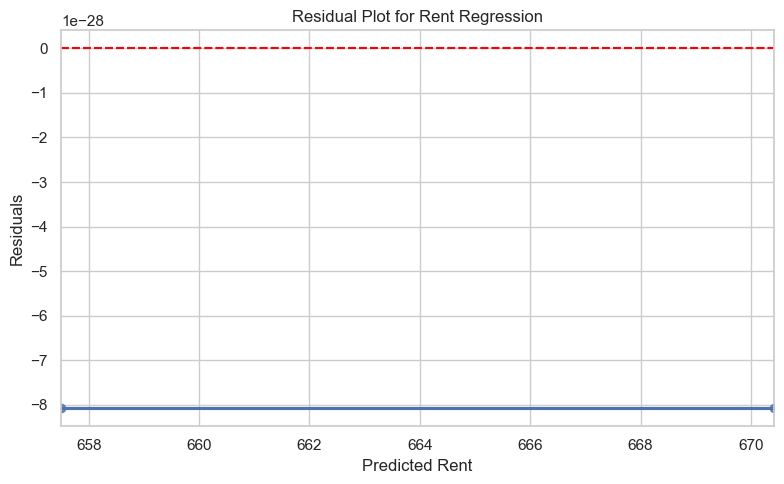

c:\Users\loyol\OneDrive\Documents\AU\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\loyol\AppData\Local\Temp\ipykernel_5880\2198191540.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Cluster"] = kmeans.fit_predict(scaled_data)


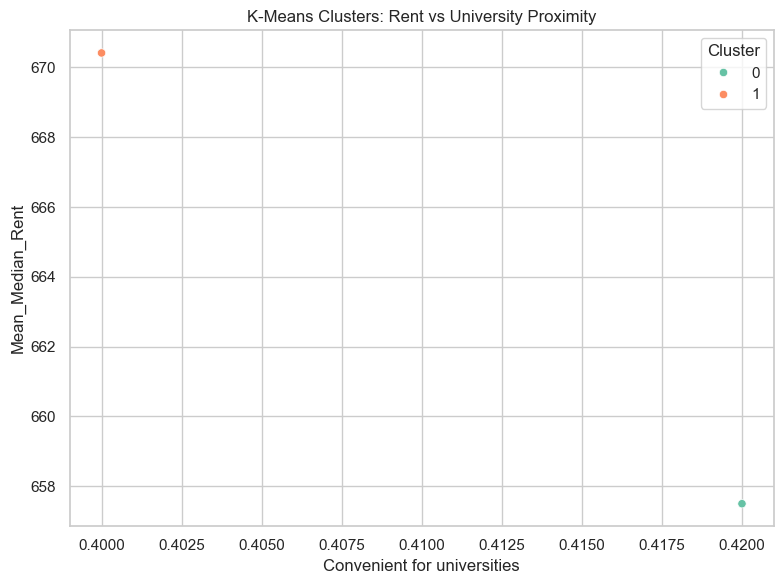

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

 
df = pd.read_csv("combined_with_housing_stress.csv")


df_clean = df.dropna()

#  REGRESSION 
# Target variable
y = df_clean["Mean_Median_Rent"]

# Perception features 
features = [
    "Safe areas for children to play outdoors",
    "A safe & secure place to live",
    "A good place to bring up kids",
    "Lots of parks with trees",
    "Convenient for universities",
    "Convenient public transport",
    "Access to, recreation facilities",
    "Tree lined streets"
]

# Ensuring  selected features are present to avoid erros 
features = [f for f in features if f in df_clean.columns]
X = df_clean[features]

# Training regression model
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Print model performance
print("\n--- REGRESSION SUMMARY ---")
print("R-squared:", round(r2_score(y, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y, y_pred)), 2))

# Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg.coef_
})
print(coeff_df)

# Residual Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=y - y_pred, lowess=True)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot for Rent Regression")
plt.xlabel("Predicted Rent")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

#  K-MEANS CLUSTERING 
# Use selected perception features + rent
features_for_clustering = X.copy()
features_for_clustering["Mean_Median_Rent"] = y

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_clustering)

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(scaled_data)

# Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x="Convenient for universities",  # Make sure this exists
    y="Mean_Median_Rent",
    hue="Cluster",
    palette="Set2"
)
plt.title("K-Means Clusters: Rent vs University Proximity")
plt.tight_layout()
plt.show()



--- REDUCED FEATURE REGRESSION SUMMARY ---
R-squared: 0.342
RMSE: 48.49
                                    Feature  Coefficient
0                        Tree lined streets -1762.030815
1  Safe areas for children to play outdoors   564.461231
2          Access to, recreation facilities  2878.135543


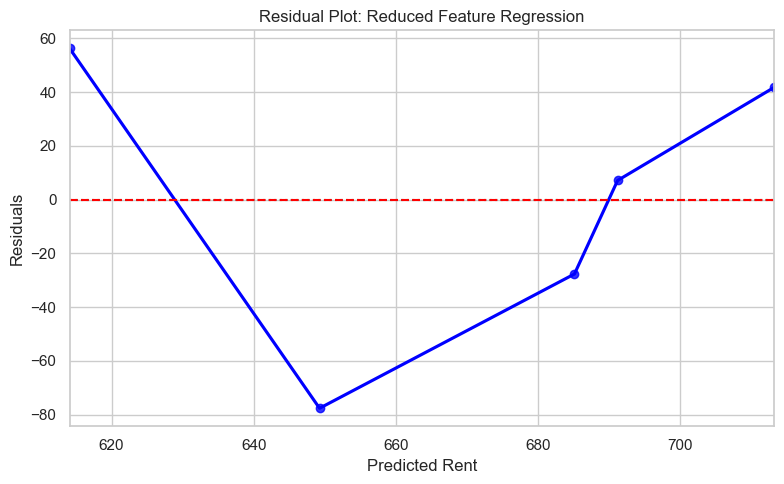

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("combined_final_data.csv") 

# Drop missing values
df_clean = df.dropna()

# Define target variable
y = df_clean["Mean_Median_Rent"]

# Reduced set of features to avoid overfitting
selected_features = [
    "Tree lined streets",
    "Safe areas for children to play outdoors",
    "Access to, recreation facilities"
]

# Defining independent variables
X = df_clean[selected_features]

# Fit  model
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Print model performance
print("\n--- REDUCED FEATURE REGRESSION SUMMARY ---")
print("R-squared:", round(r2_score(y, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y, y_pred)), 2))

# Show coefficients
coeff_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': reg.coef_
})
print(coeff_df)

# Residual Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=y - y_pred, lowess=True, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot: Reduced Feature Regression")
plt.xlabel("Predicted Rent")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


c:\Users\loyol\OneDrive\Documents\AU\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


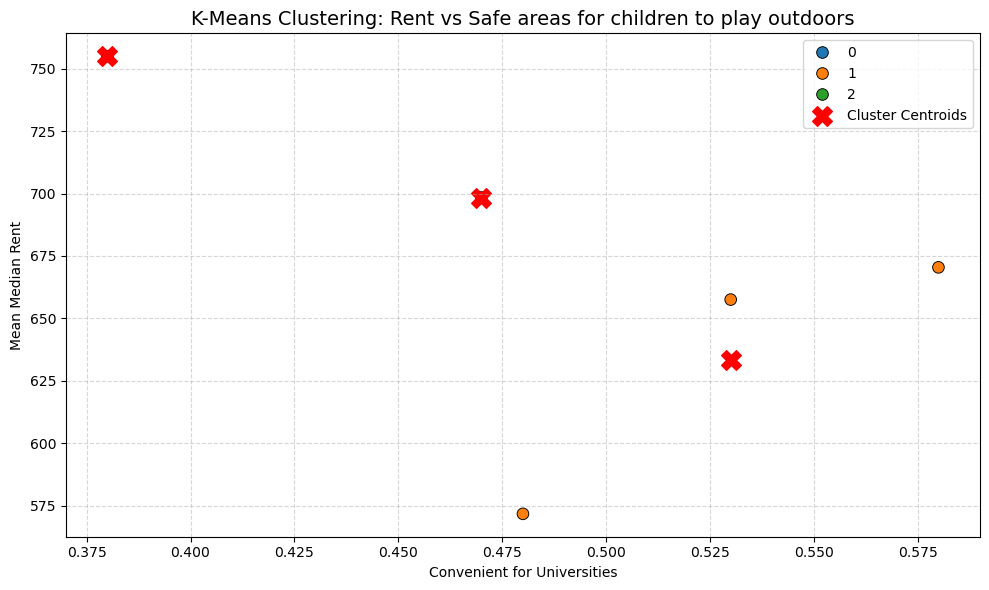

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your imputed dataset
df = pd.read_csv("imputed_combined_data.csv")

# Define relevant features
features = [
    "Safe areas for children to play outdoors",
    "A safe & secure place to live",
    "A good place to bring up kids",
    "Lots of parks with trees",
    "Convenient for universities",
    "Convenient public transport",
    "Access to, recreation facilities",
    "Tree lined streets"
]

# Drop rows with missing values in critical columns
df_cluster = df.dropna(subset=features + ["Mean_Median_Rent"]).copy()

# Prepare data for clustering
X = df_cluster[features + ["Mean_Median_Rent"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["Cluster"] = kmeans.fit_predict(X_scaled)

# Get cluster centers (inverse transform to original scale)
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids, columns=X.columns)

# Plot: Rent vs Convenience for Universities
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster,
    x="Safe areas for children to play outdoors",
    y="Mean_Median_Rent",
    hue="Cluster",
    palette="tab10",
    s=70,
    edgecolor="black"
)

# Overlay centroids
plt.scatter(
    centroids_df["Safe areas for children to play outdoors"],
    centroids_df["Mean_Median_Rent"],
    color="red",
    marker="X",
    s=200,
    label="Cluster Centroids"
)

plt.title("K-Means Clustering: Rent vs Safe areas for children to play outdoors", fontsize=14)
plt.xlabel("Convenient for Universities")
plt.ylabel("Mean Median Rent")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [5]:

import pandas as pd 
df= pd.read_csv("combined_all_files.csv")

C:\Users\loyol\AppData\Local\Temp\ipykernel_23328\3222541667.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("combined_all_files.csv")


In [6]:
df.shape

(37511, 32)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("imputed_combined_data.csv")

# Drop identifier columns and define target
X = df.drop(columns=['Mean_Median_Rent', 'Suburb', 'LGA Name'])
y = df['Mean_Median_Rent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Define parameter grids for tuning
param_grids = {
    'Ridge Regression': {
        'model__alpha': [0.01, 0.1, 1, 10, 100]
    },
    'Random Forest': {
        'model__n_estimators': [10, 50, 100],
        'model__max_depth': [None, 5, 10]
    }
}

# Prepare results dictionary
results = {}

# Train, tune, and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    if name in param_grids:
        grid = GridSearchCV(pipeline, param_grids[name], cv=2)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
    else:
        best_model = pipeline.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2 Score': r2_score(y_test, y_pred)
    }

# Display evaluation results
results_df = pd.DataFrame(results).T
print("Model Evaluation Summary:\n")
print(results_df)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\loyol\OneDrive\Documents\AU\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\loyol\OneDrive\Documents\AU\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\loyol\OneDrive\Documents\AU\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\loyol\OneDrive\Documents\AU\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\loyol\OneDrive\Documents\AU\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\loyol\OneDrive\Documents\AU\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import